In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date")
df.index = pd.to_datetime(df.index)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
# Calculate the 2.5th & 97.5th percentiles of the 'value' column
bottom_percentile = df['value'].quantile(0.025)
top_percentile = df['value'].quantile(0.975)

In [5]:
# Filter DF to keep only rows where 'value' is >=2.5th percentile
df = df[(df['value'] >= bottom_percentile)]
# Filter DF to keep only rows where 'value' is <=97.5th percentile
df = df[(df['value'] <= top_percentile)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Line Plot

Text(0, 0.5, 'Page Views')

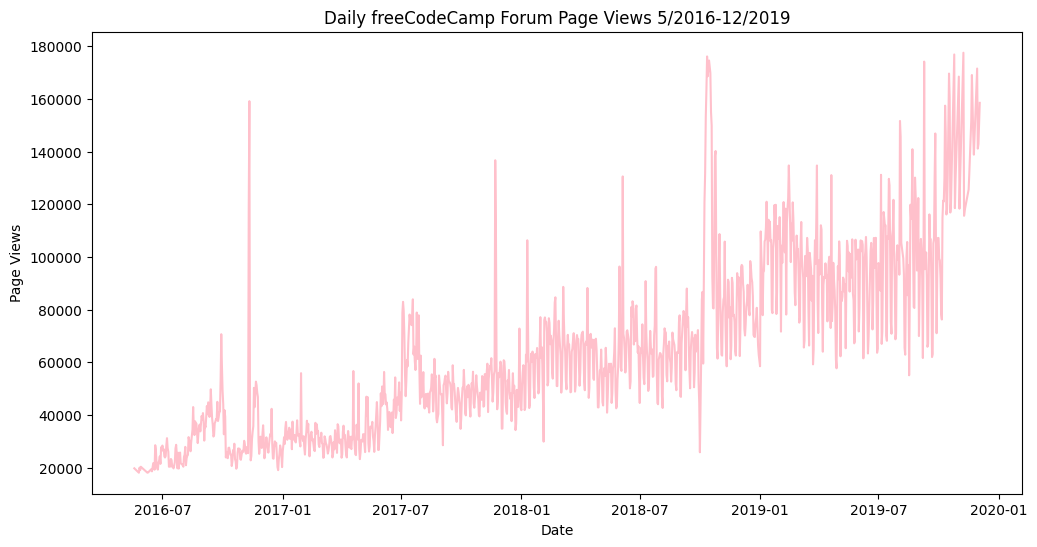

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))  # Create figure and axis
ax.plot(df.index, df['value'], color='pink')  # Plot data

# Set labels
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

### Bar Plot

In [8]:
# Copy the data and add columns for year and month
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.strftime('%B')
df_bar

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [9]:
# Group / stack the data by year and month using groupby() to obtain a GroupBy (stacked) object
df_bar_grouped = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar_grouped

year  month    
2016  August        31049.193548
      December      27832.419355
      July          24109.678571
      June          21875.105263
      May           19432.400000
      November      40448.633333
      October       27398.322581
      September     41476.866667
2017  April         30878.733333
      August        47712.451613
      December      48420.580645
      February      31113.071429
      January       32785.161290
      July          65806.838710
      June          43577.500000
      March         29369.096774
      May           34244.290323
      November      57701.566667
      October       47438.709677
      September     47376.800000
2018  April         62350.833333
      August        62831.612903
      December      80047.483871
      February      65679.000000
      January       58580.096774
      July          63591.064516
      June          70117.000000
      March         62693.774194
      May           56562.870968
      November      78688.3

In [10]:
# Unstack the grouped data to create a pivot table (with months as columns and years as rows)
df_bar = df_bar_grouped.unstack()
df_bar

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


In [11]:
# Order columns by month
months_of_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_of_year

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [12]:
# reindex() will order the columns by the order of "the_months"
df_bar = df_bar.reindex(columns=months_of_year)
df_bar

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


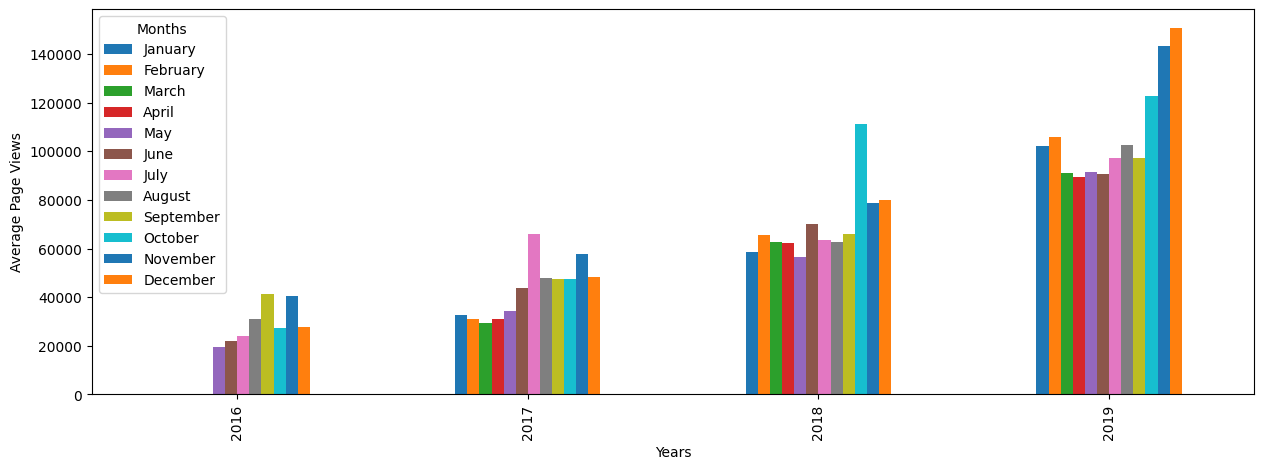

In [13]:
# Draw bar plot
fig, ax = plt.subplots(figsize=(15, 5))
df_bar.plot(kind='bar', ax=ax)
ax.set(xlabel="Years", ylabel="Average Page Views")
ax.legend(title='Months')

### Box Plot

In [14]:
# Copy the data and add columns for year and month
df_box = df.copy()
df_box['year'] = df_box.index.year
df_box['month'] = df_box.index.strftime('%b')
df_box

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,Nov
2019-11-29,171584,2019,Nov
2019-11-30,141161,2019,Nov


In [15]:
# Add a new (month number) column to DF (Jan=1, Feb=2, Mar=3, etc)
df_box['month_num'] = df.index.month
df_box

,value,year,month,month_num
date,,,,
2016-05-19,19736,2016,May,5
2016-05-26,18060,2016,May,5
2016-05-27,19997,2016,May,5
2016-05-28,19044,2016,May,5
2016-05-29,20325,2016,May,5
...,...,...,...,...
2019-11-24,138875,2019,Nov,11
2019-11-29,171584,2019,Nov,11
2019-11-30,141161,2019,Nov,11


In [16]:
# Sort DF based on 'month_num'
df_box = df_box.sort_values('month_num')
df_box

,value,year,month,month_num
date,,,,
2019-01-26,78342,2019,Jan,1
2019-01-27,86596,2019,Jan,1
2019-01-28,111784,2019,Jan,1
2019-01-29,107881,2019,Jan,1
2019-01-30,106844,2019,Jan,1
...,...,...,...,...
2016-12-05,25527,2016,Dec,12
2016-12-04,23536,2016,Dec,12
2016-12-03,31115,2016,Dec,12


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

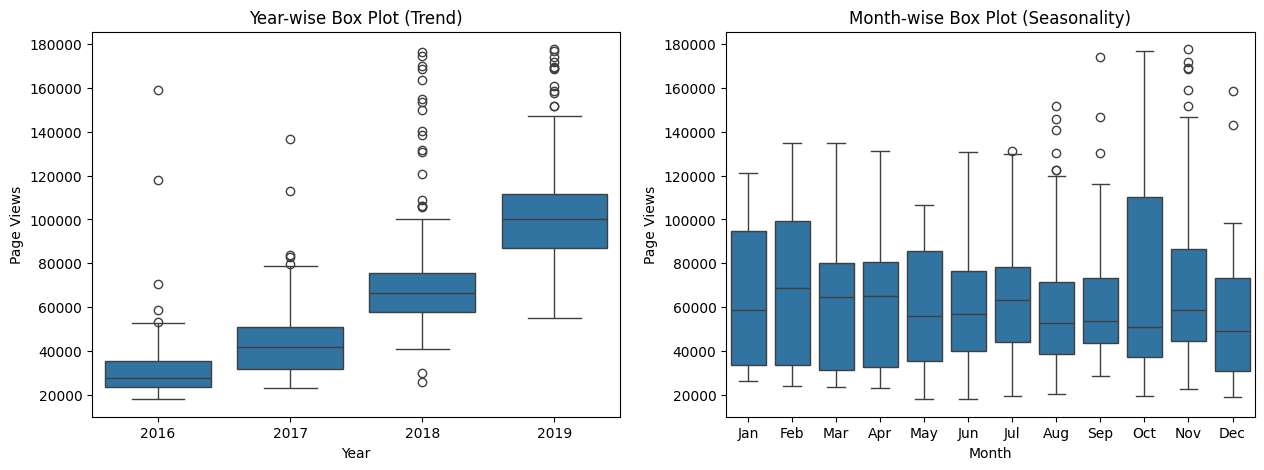

In [19]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Box plot in 1st subplot (ax[0])
sns.boxplot(data = df_box, x = "year", y = "value", ax = ax[0]) 
(ax[0]).set_xlabel("Year")
(ax[0]).set_ylabel("Page Views")
(ax[0]).set_title("Year-wise Box Plot (Trend)")

# Box plot in 2nd subplot (ax[1])
sns.boxplot(data = df_box, x = "month", y = "value", ax = ax[1])
(ax[1]).set_xlabel("Month")
(ax[1]).set_ylabel("Page Views")
(ax[1]).set_title("Month-wise Box Plot (Seasonality)")